# Create sample data

In [1]:
import pandas as pd
import numpy as np

# define some constants
NUM_ROWS = 100
AGE_GROUPS = ['26-39', '40-64', '>=65']

# set a seed to get the same set of randomly-generated data every time
np.random.seed(0)

# create the dataframe and insert the columns
df = pd.DataFrame()
df['age'] = np.random.choice(AGE_GROUPS, NUM_ROWS)
df['truth'] = np.random.randint(2, size=NUM_ROWS)
df['prediction'] = np.random.randint(2, size=NUM_ROWS)

print(df)

      age  truth  prediction
0   26-39      0           1
1   40-64      1           1
2   26-39      0           1
3   40-64      1           1
4   40-64      1           0
..    ...    ...         ...
95  26-39      1           0
96   >=65      0           0
97  26-39      0           0
98  40-64      1           0
99   >=65      0           1

[100 rows x 3 columns]


# Create and run a Model Test

In [2]:
from verifyml.model_tests.FEAT import SubgroupDisparity

sgd_test = SubgroupDisparity(
    attr='age',
    metric='fpr',
    method='ratio',
    threshold=2,  
)
sgd_test.run(df)

True

# Check out the results

In [3]:
sgd_test.passed

True

In [4]:
sgd_test.result

,age_fpr_max_ratio
0,1.571


# Create a stricter test

In [5]:
sgd_test_strict = SubgroupDisparity(
    attr='age',
    metric='fpr',
    method='ratio',
    threshold=1.57,
)

sgd_test_strict.run(df)

False

In [6]:
sgd_test_strict.passed

False

In [7]:
sgd_test_strict.result

,age_fpr_max_ratio
0,1.571


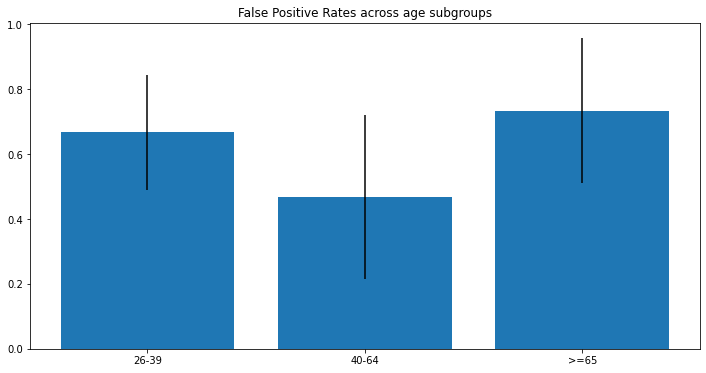

In [8]:
sgd_test.plot()

# Init a Model Card

In [9]:
import verifyml.model_card_toolkit as mctlib

mct = mctlib.ModelCardToolkit(
  output_dir='model_card_output',
  file_name='first_model_card'
)
# init model card assets using the toolkit
model_card = mct.scaffold_assets()

model_card.model_details.name = 'Credit Card Fraud Detection Model'
model_card.model_details.overview = 'This model predicts whether credit card transactions are fraudulent.'

# Attach the test to the Model Card

In [10]:
# a model-card-compatible test object 
mc_sgd_test = mctlib.Test()
mc_sgd_test.read_model_test(sgd_test)

# a fairness report
report = mctlib.FairnessReport(
    type="Disparity in FPR ratio between age groups should not exceed 2", 
    tests=[mc_sgd_test]
)

# attach the report to the model card
model_card.fairness_analysis.fairness_reports = [report]

# update card with changes
mct.update_model_card(model_card)

# Display the Model Card

In [11]:
from IPython.display import HTML

html = mct.export_format(output_file='first_model_card.html')

# display the HTML in the notebook
HTML(html)

,age_fpr_max_ratio
0,1.571
